### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Importing .csv files

In [2]:
df_chiller01 = pd.read_csv('data/chiller01.csv', sep=';', index_col=0)
df_chiller03 = pd.read_csv('data/chiller03.csv', sep=';', index_col=0)

In [95]:
df_chiller01.head()

Timestamp                        Equipamento  rendimento  \
0  01/09/2021 09:45:00  AC - CAG 1 - PISO G4 - CF 01 - 31        0.16   
1  01/09/2021 10:00:00  AC - CAG 1 - PISO G4 - CF 01 - 31        0.41   
2  01/09/2021 10:15:00  AC - CAG 1 - PISO G4 - CF 01 - 31        0.16   
3  01/09/2021 10:30:00  AC - CAG 1 - PISO G4 - CF 01 - 31        0.15   
4  01/09/2021 10:45:00  AC - CAG 1 - PISO G4 - CF 01 - 31        0.16   

   carga_termica_TR  potencia_kW  temp_ambiente_C  umid_rel_%  temp_saida_C  \
0             555.4       301.83             21.1        91.4          13.0   
1             243.7       350.43             21.6        89.7          10.9   
2             612.3       349.55             22.0        85.7          10.2   
3             648.3       350.14             22.5        82.7           9.7   
4             644.5       351.34             22.8        80.6           9.4   

   temp_entrada_C  ur_delta_temp_C  ...  carregamento_%  carga_termica_^2  \
0            17.6              5.0  ...       85.446154         308469.16   
1            16.3              4.9  ...       37.492308          59389.69   
2            15.6              5.4  ...       94.200000         374911.29   
3            15.3              5.1  ...       99.738462         420292.89   
4            14.8              5.2  ...       99.153846         415380.25   

   rend_pred  carga_termica_inv  rend_pred_b  rend_pred_c  carga_termica_log  \
0   0.216613           0.001801     0.151587     0.152651           6.319689   
1   0.277162           0.004103     0.195438     0.206924           5.495938   
2   0.178412           0.001633     0.148401     0.162651           6.417222   
3   0.171038           0.001542     0.146674     0.172153           6.474354   
4   0.163840           0.001552     0.146847     0.171034           6.468475   

   rendimento_log  rend_pred_d  rend_pred_e  
0       -1.832581     0.151921     0.151573  
1       -0.891598     0.188540     0.332298  
2       -1.832581     0.148086     0.179792  
3       -1.897120     0.145885     0.172448  
4       -1.832581     0.146110     0.164177  

[5 rows x 22 columns]

In [4]:
df_chiller03.head()

Timestamp                        Equipamento  rendimento  \
47  04/09/2021 14:00:00  AC - CAG 1 - PISO G4 - CF 03 - 31        0.15   
49  04/09/2021 14:30:00  AC - CAG 1 - PISO G4 - CF 03 - 31        0.16   
58  04/09/2021 16:45:00  AC - CAG 1 - PISO G4 - CF 03 - 31        0.16   
59  04/09/2021 17:00:00  AC - CAG 1 - PISO G4 - CF 03 - 31        0.17   
60  04/09/2021 17:15:00  AC - CAG 1 - PISO G4 - CF 03 - 31        0.16   

    carga_termica_TR  potencia_kW  temp_ambiente_C  umid_rel_%  temp_saida_C  \
47             631.8        350.0             28.4        40.8           9.6   
49             640.9        348.0             28.4        46.5           9.6   
58             641.1        349.0             28.4        54.9          10.6   
59             573.7        350.0             28.0        55.6          10.7   
60             616.1        351.0             27.5        57.0          10.7   

    temp_entrada_C  ur_delta_temp_C  vazao_saida_m3h  temp_entrada_cond_C  \
47            15.6              6.0            331.8                 27.2   
49            15.5              5.9            351.0                 29.0   
58            16.5              6.3            352.5                 29.7   
59            16.6              6.4            347.7                 29.8   
60            16.6              6.4            351.3                 29.9   

    carregamento_%  
47       97.200000  
49       98.600000  
58       98.630769  
59       88.261538  
60       94.784615

### Checking correlations

In [5]:
df_chiller01.corr().loc['rendimento', :].sort_values()

carga_termica_TR      -0.437357
carregamento_%        -0.437357
vazao_saida_m3h       -0.414385
ur_delta_temp_C       -0.181551
potencia_kW           -0.117108
umid_rel_%            -0.087677
temp_ambiente_C        0.080180
temp_entrada_cond_C    0.144571
temp_entrada_C         0.309148
temp_saida_C           0.451025
rendimento             1.000000
Name: rendimento, dtype: float64

In [6]:
df_chiller03.corr().loc['rendimento', :].sort_values()

carga_termica_TR      -0.551455
carregamento_%        -0.551455
umid_rel_%            -0.045271
vazao_saida_m3h       -0.031124
ur_delta_temp_C        0.009806
temp_ambiente_C        0.040204
temp_entrada_cond_C    0.092073
potencia_kW            0.109151
temp_saida_C           0.148617
temp_entrada_C         0.163155
rendimento             1.000000
Name: rendimento, dtype: float64

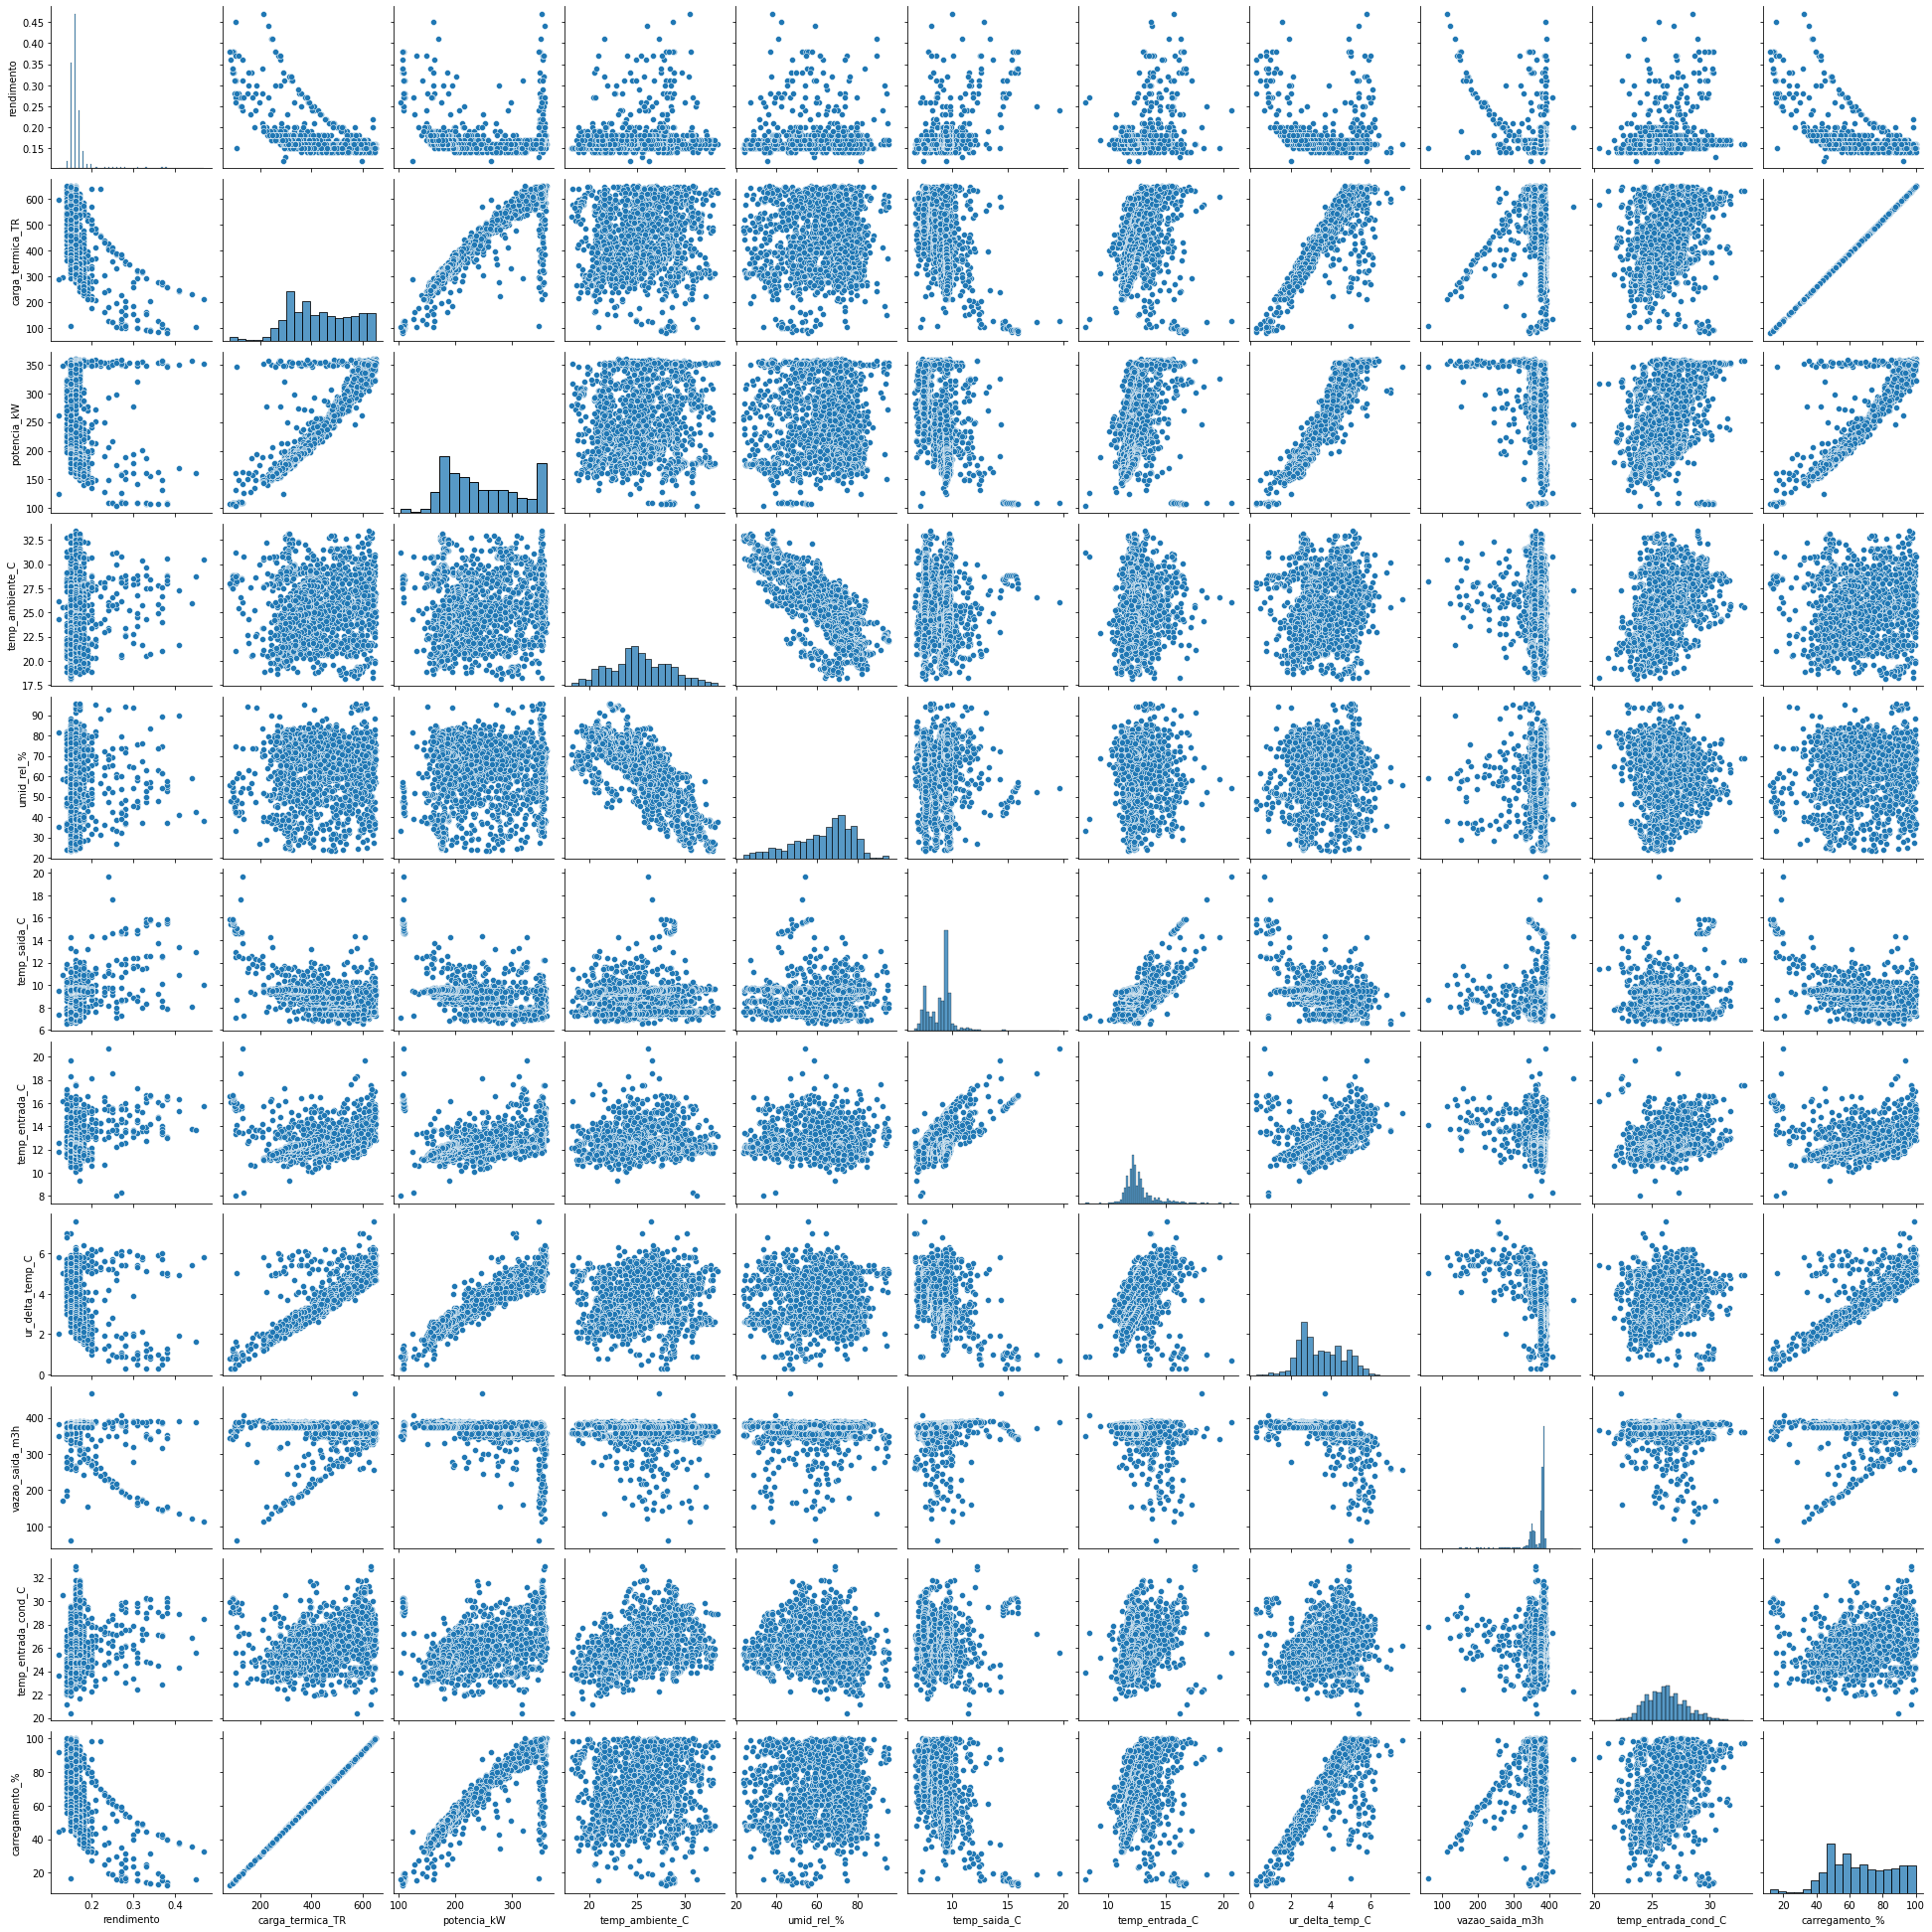

In [7]:
sns.pairplot(df_chiller01)

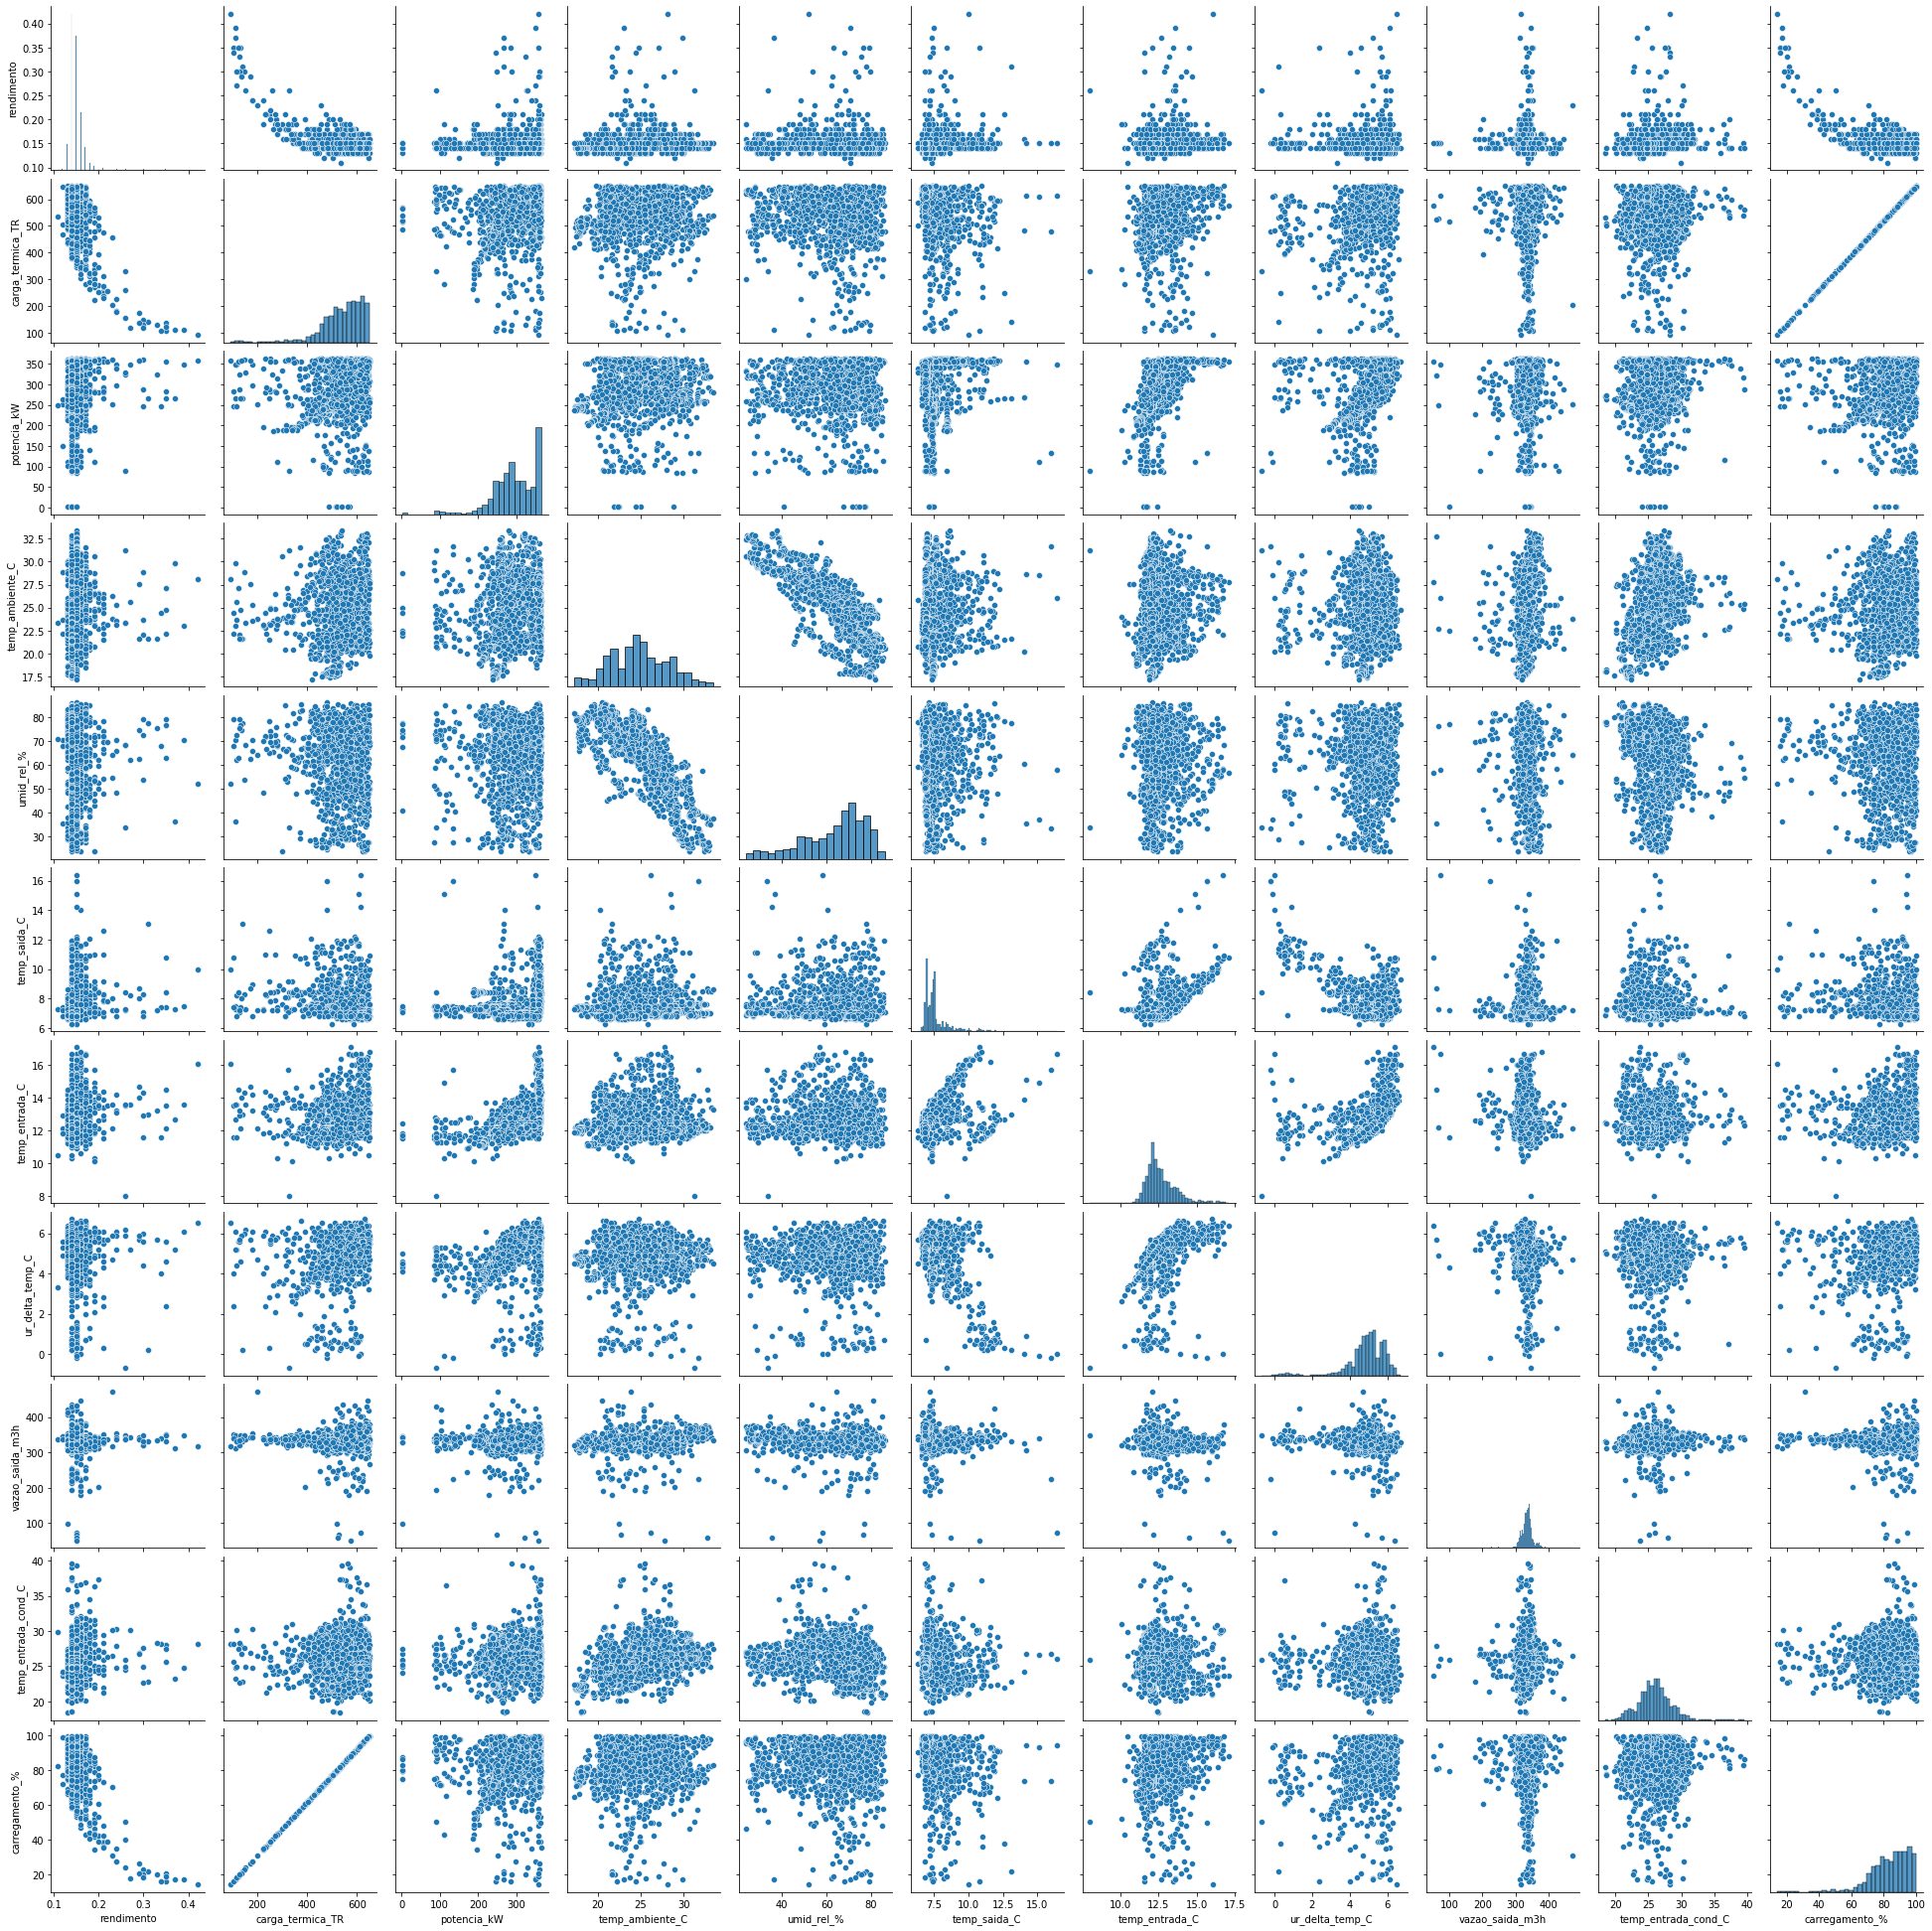

In [8]:
sns.pairplot(df_chiller03)

## Using PCA

### Standardizing the data

In [9]:
df_chiller01.columns

Index(['Timestamp', 'Equipamento', 'rendimento', 'carga_termica_TR',
       'potencia_kW', 'temp_ambiente_C', 'umid_rel_%', 'temp_saida_C',
       'temp_entrada_C', 'ur_delta_temp_C', 'vazao_saida_m3h',
       'temp_entrada_cond_C', 'carregamento_%'],
      dtype='object')

In [10]:
features = ['carga_termica_TR',
       'potencia_kW', 'temp_ambiente_C', 'umid_rel_%', 'temp_saida_C',
       'temp_entrada_C', 'ur_delta_temp_C', 'vazao_saida_m3h',
       'temp_entrada_cond_C', 'carregamento_%']

df_chiller01['carga_termica_^2'] = df_chiller01['carga_termica_TR']**2
df_chiller03['carga_termica_^2'] = df_chiller03['carga_termica_TR']**2

features2 = ['carga_termica_TR','temp_ambiente_C', 'umid_rel_%', 'temp_saida_C',
       'temp_entrada_C', 'ur_delta_temp_C', 'vazao_saida_m3h',
       'temp_entrada_cond_C', 'carga_termica_^2']

X1 = df_chiller01.loc[:, features2].values
X3 = df_chiller03.loc[:, features2].values

X1_transf = StandardScaler().fit_transform(X1)
X3_transf = StandardScaler().fit_transform(X3)

y1 = df_chiller01.loc[:, ['rendimento']].values
y3 = df_chiller03.loc[:, ['rendimento']].values

### Reducing dimensions

In [11]:
pca1 = PCA(n_components=4)
principal_components1 = pca1.fit_transform(X1_transf)
pc_df1 = pd.DataFrame(data = principal_components1, columns = ['pc1', 'pc2', 'pc3', 'pc4'])
final_df1 = pd.concat([pc_df1, df_chiller01[['rendimento']]], axis = 1)
pca1.explained_variance_ratio_

array([0.39285499, 0.22285461, 0.16347891, 0.12062753])

In [12]:
np.sum(pca1.explained_variance_ratio_)

0.8998160454653021

In [13]:
pca3 = PCA(n_components=4)
principal_components3 = pca3.fit_transform(X3_transf)
pc_df3 = pd.DataFrame(data = principal_components3, columns = ['pc1', 'pc2', 'pc3', 'pc4'])
final_df3 = pd.concat([pc_df3, df_chiller01[['rendimento']]], axis = 1)
pca3.explained_variance_ratio_

array([0.26353194, 0.22173318, 0.17002532, 0.12856448])

In [14]:
np.sum(pca3.explained_variance_ratio_)

0.7838549211473987

### Visualizing

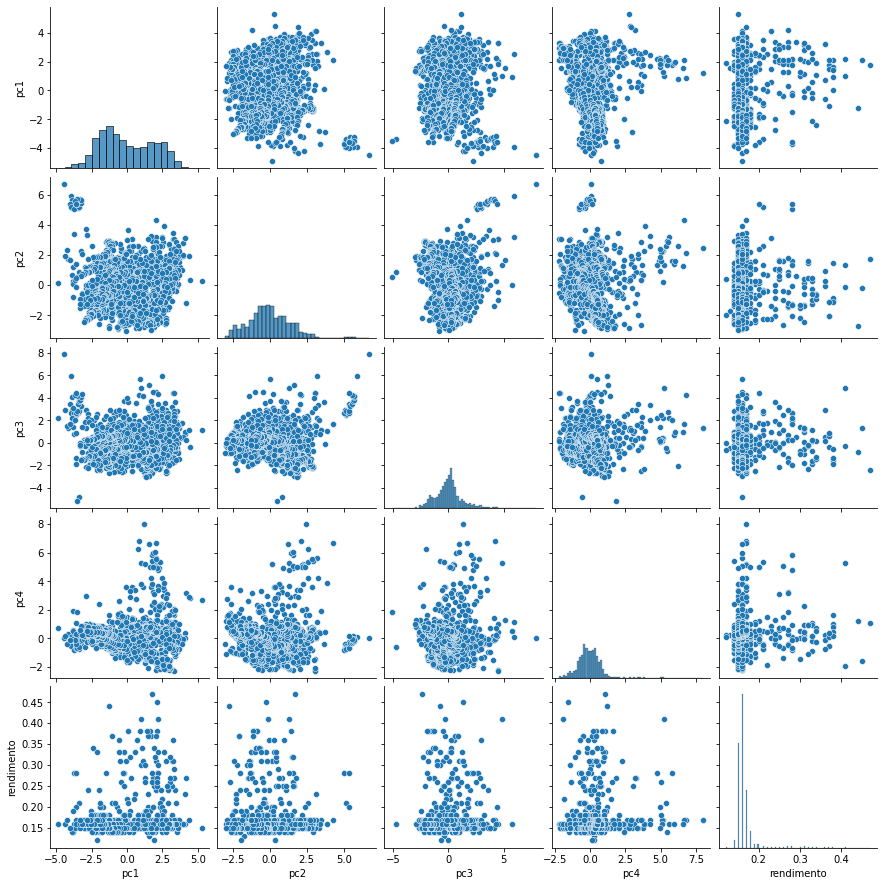

In [15]:
sns.pairplot(final_df1)

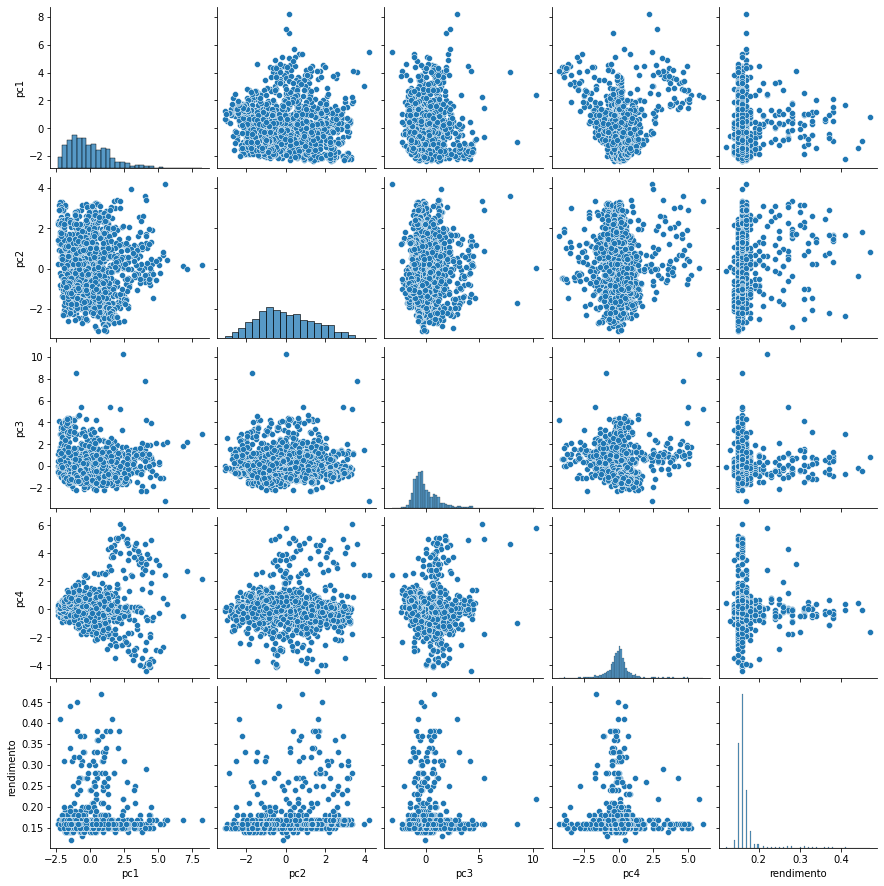

In [16]:
sns.pairplot(final_df3)

### Linear Regression
### Approach (a)

In [17]:
model1 = LinearRegression()
model3 = LinearRegression()

In [18]:
model1.fit(principal_components1, y1)
model3.fit(principal_components3, y3)

LinearRegression()

In [19]:
df_chiller01['rend_pred'] = model1.predict(principal_components1)
df_chiller03['rend_pred'] = model3.predict(principal_components3)

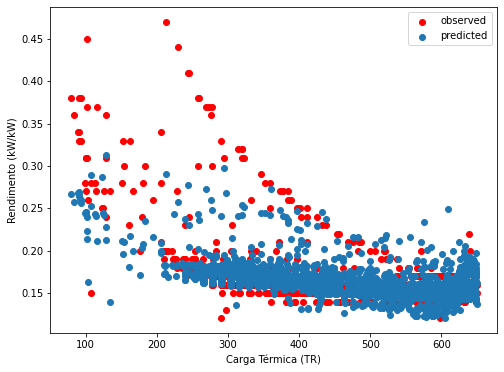

In [20]:
plt.figure(figsize=(8,6))
plt.xlabel('Carga Térmica (TR)')
plt.ylabel('Rendimento (kW/kW)')
plt.scatter(df_chiller01['carga_termica_TR'], df_chiller01['rendimento'], color='red', label='observed')

# plot the predicted values together with the observed values
plt.scatter(df_chiller01['carga_termica_TR'], df_chiller01['rend_pred'], label='predicted')


plt.legend();

In [21]:
np.sqrt(mean_squared_error(df_chiller01['rendimento'], df_chiller01['rend_pred']))

0.024754485187101674

In [22]:
np.sqrt(mean_squared_error(df_chiller01['rendimento'], df_chiller01['rend_pred']))/df_chiller01['rendimento'].mean()

0.14884343502489328

In [23]:
model1.score(principal_components1, y1)

0.43715886503333734

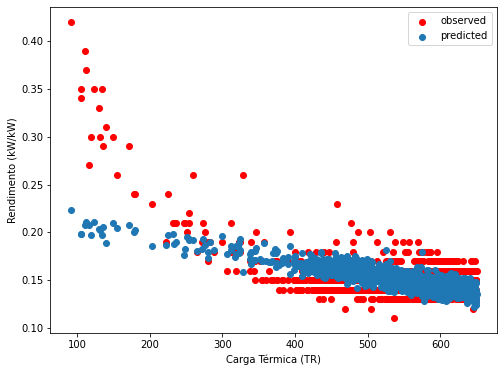

In [24]:
plt.figure(figsize=(8,6))
plt.xlabel('Carga Térmica (TR)')
plt.ylabel('Rendimento (kW/kW)')
plt.scatter(df_chiller03['carga_termica_TR'], df_chiller03['rendimento'], color='red', label='observed')

# plot the predicted values together with the observed values
plt.scatter(df_chiller03['carga_termica_TR'], df_chiller03['rend_pred'], label='predicted')


plt.legend();

In [25]:
np.sqrt(mean_squared_error(df_chiller03['rendimento'], df_chiller03['rend_pred']))

0.019322729271832425

In [26]:
np.sqrt(mean_squared_error(df_chiller03['rendimento'], df_chiller03['rend_pred']))/df_chiller03['rendimento'].mean()

0.12780576672455035

In [27]:
model3.score(principal_components3, y3)

0.2990659366760974

## Another approach (b)
creating the 1/carga térmica variable

In [28]:
df_chiller01['carga_termica_inv'] = 1/df_chiller01['carga_termica_TR']
df_chiller03['carga_termica_inv'] = 1/df_chiller03['carga_termica_TR']

<AxesSubplot:xlabel='carga_termica_inv', ylabel='rendimento'>

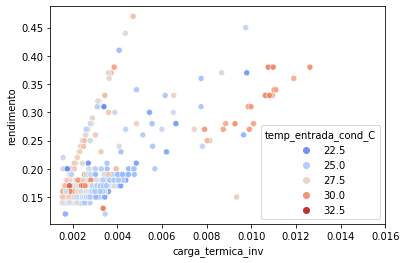

In [29]:
plt.xlim(0.001, 0.016)
sns.scatterplot(x=df_chiller01.carga_termica_inv, y=df_chiller01.rendimento, hue=df_chiller01.temp_entrada_cond_C, palette="coolwarm")

<AxesSubplot:xlabel='carga_termica_inv', ylabel='rendimento'>

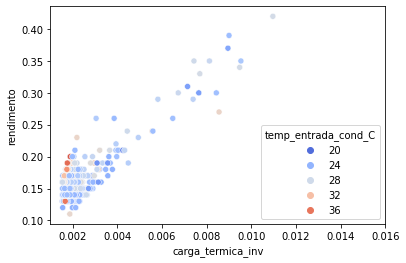

In [30]:
plt.xlim(0.001, 0.016)
sns.scatterplot(x=df_chiller03.carga_termica_inv, y=df_chiller03.rendimento, hue=df_chiller03.temp_entrada_cond_C, palette="coolwarm")

### Linear regression

In [31]:
model1b = LinearRegression()
model3b = LinearRegression()

X1b = df_chiller01[['carga_termica_inv']]
X3b = df_chiller03[['carga_termica_inv']]

In [32]:
model1b.fit(X1b, y1)
model3b.fit(X3b, y3)

LinearRegression()

In [33]:
df_chiller01['rend_pred_b'] = model1b.predict(X1b)
df_chiller03['rend_pred_b'] = model3b.predict(X3b)

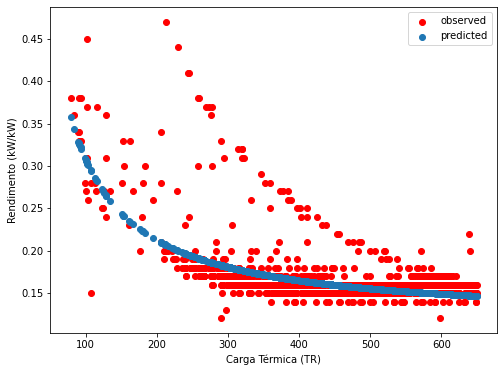

In [34]:
plt.figure(figsize=(8,6))
plt.xlabel('Carga Térmica (TR)')
plt.ylabel('Rendimento (kW/kW)')
plt.scatter(df_chiller01['carga_termica_TR'], df_chiller01['rendimento'], color='red', label='observed')

# plot the predicted values together with the observed values
plt.scatter(df_chiller01['carga_termica_TR'], df_chiller01['rend_pred_b'], label='predicted')


plt.legend();

In [35]:
np.sqrt(mean_squared_error(df_chiller01['rendimento'], df_chiller01['rend_pred_b']))

0.024790588157028004

In [36]:
model1b.score(X1b, y1)

0.4355159260383199

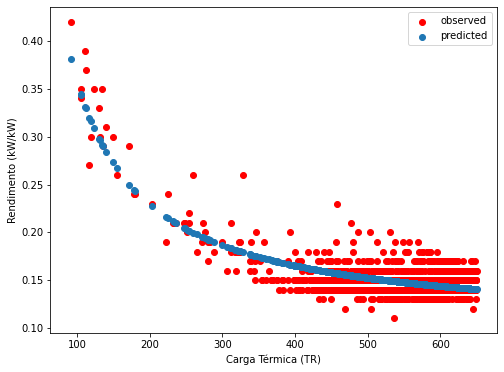

In [37]:
plt.figure(figsize=(8,6))
plt.xlabel('Carga Térmica (TR)')
plt.ylabel('Rendimento (kW/kW)')
plt.scatter(df_chiller03['carga_termica_TR'], df_chiller03['rendimento'], color='red', label='observed')

# plot the predicted values together with the observed values
plt.scatter(df_chiller03['carga_termica_TR'], df_chiller03['rend_pred_b'], label='predicted')


plt.legend();

In [38]:
np.sqrt(mean_squared_error(df_chiller03['rendimento'], df_chiller03['rend_pred_b']))

0.01331309836605397

In [39]:
model3b.score(X3b, y3)

0.6672649821258263

## Another approach (c)
polinomial regression

In [40]:
df_chiller01['carga_termica_^2'] = df_chiller01['carga_termica_TR']**2
df_chiller03['carga_termica_^2'] = df_chiller03['carga_termica_TR']**2

In [41]:
model1c = LinearRegression()
model3c = LinearRegression()

X1c = df_chiller01[['carga_termica_TR', 'carga_termica_^2']]
X3c = df_chiller03[['carga_termica_TR', 'carga_termica_^2']]

In [42]:
model1c.fit(X1c, y1)
model3c.fit(X3c, y3)

LinearRegression()

In [43]:
df_chiller01['rend_pred_c'] = model1c.predict(X1c)
df_chiller03['rend_pred_c'] = model3c.predict(X3c)

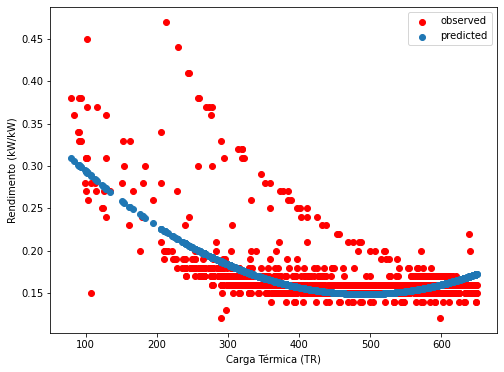

In [44]:
plt.figure(figsize=(8,6))
plt.xlabel('Carga Térmica (TR)')
plt.ylabel('Rendimento (kW/kW)')
plt.scatter(df_chiller01['carga_termica_TR'], df_chiller01['rendimento'], color='red', label='observed')

# plot the predicted values together with the observed values
plt.scatter(df_chiller01['carga_termica_TR'], df_chiller01['rend_pred_c'], label='predicted')


plt.legend();

In [45]:
np.sqrt(mean_squared_error(df_chiller01['rendimento'], df_chiller01['rend_pred_c']))

0.024604482293844814

In [46]:
np.sqrt(mean_squared_error(df_chiller01['rendimento'], df_chiller01['rend_pred_c']))/df_chiller01['rendimento'].mean()

0.14794149964925246

In [47]:
model1c.score(X1c, y1)

0.44395941028078334

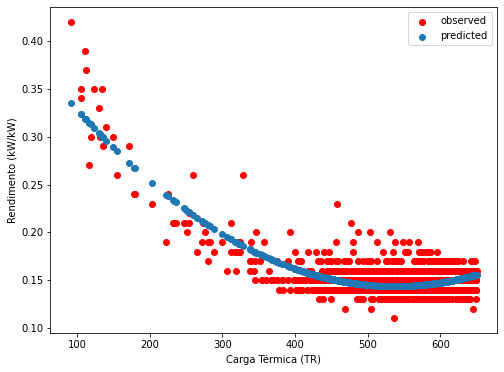

In [48]:
plt.figure(figsize=(8,6))
plt.xlabel('Carga Térmica (TR)')
plt.ylabel('Rendimento (kW/kW)')
plt.scatter(df_chiller03['carga_termica_TR'], df_chiller03['rendimento'], color='red', label='observed')

# plot the predicted values together with the observed values
plt.scatter(df_chiller03['carga_termica_TR'], df_chiller03['rend_pred_c'], label='predicted')


plt.legend();

In [49]:
np.sqrt(mean_squared_error(df_chiller03['rendimento'], df_chiller03['rend_pred_c']))

0.012629238230338713

In [50]:
np.sqrt(mean_squared_error(df_chiller03['rendimento'], df_chiller03['rend_pred_c']))/df_chiller03['rendimento'].mean()

0.08353320343458781

In [51]:
model3c.score(X3c, y3)

0.7005705318131632

### Another approach (d)
logarithm regression

In [52]:
df_chiller01['carga_termica_log'] = np.log(df_chiller01['carga_termica_TR'])
df_chiller01['rendimento_log'] = np.log(df_chiller01['rendimento'])
df_chiller03['carga_termica_log'] = np.log(df_chiller03['carga_termica_TR'])
df_chiller03['rendimento_log'] = np.log(df_chiller03['rendimento'])

<AxesSubplot:xlabel='carga_termica_log', ylabel='rendimento_log'>

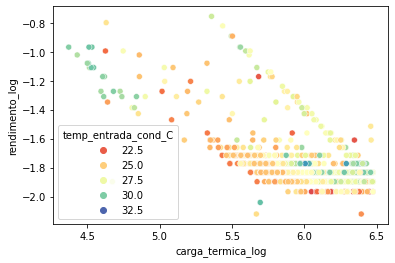

In [53]:
sns.scatterplot(x=df_chiller01.carga_termica_log, y=df_chiller01.rendimento_log, hue=df_chiller01.temp_entrada_cond_C, palette="Spectral")

<AxesSubplot:xlabel='carga_termica_log', ylabel='rendimento_log'>

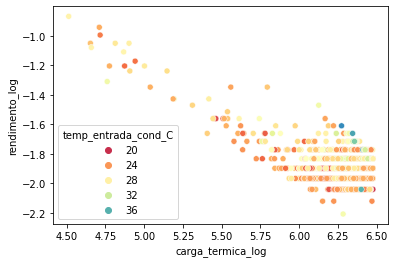

In [54]:
sns.scatterplot(x=df_chiller03.carga_termica_log, y=df_chiller03.rendimento_log, hue=df_chiller03.temp_entrada_cond_C, palette="Spectral")

In [55]:
model1d = LinearRegression()
model3d = LinearRegression()

X1d = df_chiller01[['carga_termica_log']]
X3d = df_chiller03[['carga_termica_log']]

In [56]:
y1d = df_chiller01.loc[:, ['rendimento_log']].values
y3d = df_chiller03.loc[:, ['rendimento_log']].values

In [57]:
model1d.fit(X1d, y1d)
model3d.fit(X3d, y3d)

LinearRegression()

In [58]:
df_chiller01['rend_pred_d'] = np.exp(model1d.predict(X1d))
df_chiller03['rend_pred_d'] = np.exp(model3d.predict(X3d))

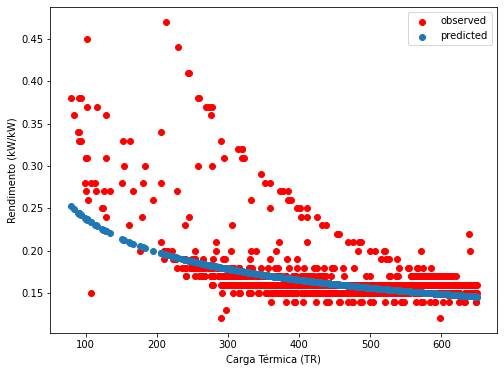

In [59]:
plt.figure(figsize=(8,6))
plt.xlabel('Carga Térmica (TR)')
plt.ylabel('Rendimento (kW/kW)')
plt.scatter(df_chiller01['carga_termica_TR'], df_chiller01['rendimento'], color='red', label='observed')

# plot the predicted values together with the observed values
plt.scatter(df_chiller01['carga_termica_TR'], df_chiller01['rend_pred_d'], label='predicted')


plt.legend();

In [60]:
np.sqrt(mean_squared_error(df_chiller01['rendimento'], df_chiller01['rend_pred_d']))

0.02704081222138005

In [61]:
model1d.score(X1d, y1d)

0.33795167292698214

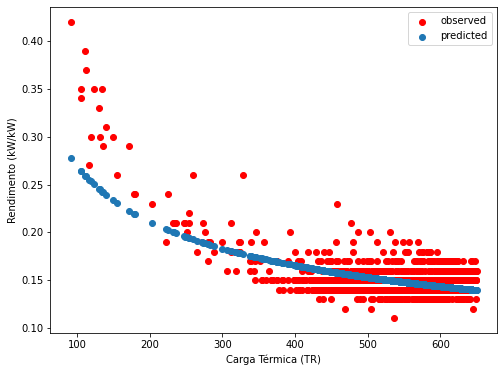

In [62]:
plt.figure(figsize=(8,6))
plt.xlabel('Carga Térmica (TR)')
plt.ylabel('Rendimento (kW/kW)')
plt.scatter(df_chiller03['carga_termica_TR'], df_chiller03['rendimento'], color='red', label='observed')

# plot the predicted values together with the observed values
plt.scatter(df_chiller03['carga_termica_TR'], df_chiller03['rend_pred_d'], label='predicted')


plt.legend();

In [63]:
np.sqrt(mean_squared_error(df_chiller03['rendimento'], df_chiller03['rend_pred_d']))

0.015646695364024174

In [64]:
model3d.score(X3d, y3d)

0.424692695317032

## Another approach (e)
multiple variables linear regression (without PCA technique)

In [65]:
X1e = df_chiller01.loc[:, features2].values
X3e = df_chiller03.loc[:, features2].values

In [66]:
model1e = LinearRegression()
model3e = LinearRegression()

X1e_transf = StandardScaler().fit_transform(X1)
X3e_transf = StandardScaler().fit_transform(X3)

y1e = df_chiller01.loc[:, ['rendimento']].values
y3e = df_chiller03.loc[:, ['rendimento']].values

In [67]:
model1e.fit(X1, y1e)
model3e.fit(X3, y3e)

#model1e.fit(X1e_transf, y1e)
#model3e.fit(X3e_transf, y3e)

LinearRegression()

In [68]:
df_chiller01['rend_pred_e'] = model1e.predict(X1e)
df_chiller03['rend_pred_e'] = model3e.predict(X3e)

#df_chiller01['rend_pred_e'] = model1e.predict(X1e_transf)
#df_chiller03['rend_pred_e'] = model3e.predict(X3e_transf)

Chiller 01
R2 = 0.6991226430292409
RMSE = 0.018099048194776386
CV(RMSE) = 0.10882571314370458



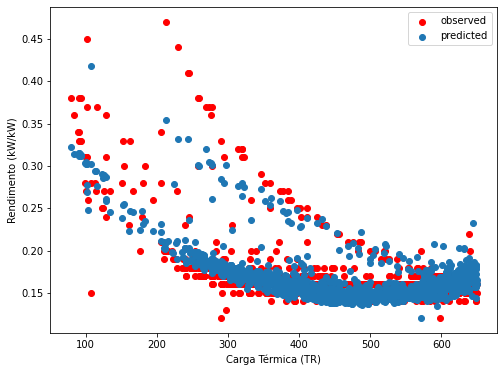

In [69]:
plt.figure(figsize=(8,6))
plt.xlabel('Carga Térmica (TR)')
plt.ylabel('Rendimento (kW/kW)')
plt.scatter(df_chiller01['carga_termica_TR'], df_chiller01['rendimento'], color='red', label='observed')

# plot the predicted values together with the observed values
plt.scatter(df_chiller01['carga_termica_TR'], df_chiller01['rend_pred_e'], label='predicted')


plt.legend();

rmse = np.sqrt(mean_squared_error(df_chiller01['rendimento'], df_chiller01['rend_pred_e']))
cvrmse = np.sqrt(mean_squared_error(df_chiller01['rendimento'], df_chiller01['rend_pred_e']))/df_chiller01['rendimento'].mean()
r2 = model1e.score(X1e, y1e)

print(f"""Chiller 01
R2 = {r2}
RMSE = {rmse}
CV(RMSE) = {cvrmse}
""")

In [70]:
np.sqrt(mean_squared_error(df_chiller01['rendimento'], df_chiller01['rend_pred_e']))

0.018099048194776386

In [71]:
np.sqrt(mean_squared_error(df_chiller01['rendimento'], df_chiller01['rend_pred_e']))/df_chiller01['rendimento'].mean()

0.10882571314370458

In [72]:
model1e.score(X1e, y1e)
#model1e.score(X1e_transf, y1e)

0.6991226430292409

Chiller 03
R2 = 0.7339130062088776
RMSE = 0.011905337445833835
CV(RMSE) = 0.07874512751143041



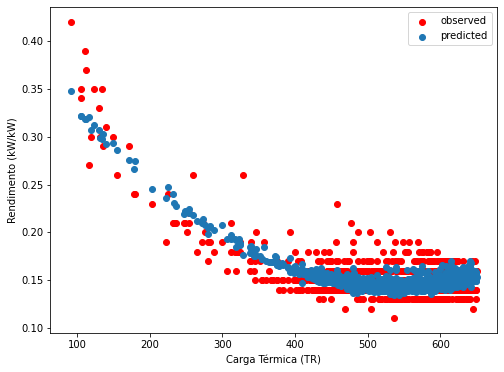

In [73]:
plt.figure(figsize=(8,6))
plt.xlabel('Carga Térmica (TR)')
plt.ylabel('Rendimento (kW/kW)')
plt.scatter(df_chiller03['carga_termica_TR'], df_chiller03['rendimento'], color='red', label='observed')

# plot the predicted values together with the observed values
plt.scatter(df_chiller03['carga_termica_TR'], df_chiller03['rend_pred_e'], label='predicted')


plt.legend();

rmse = np.sqrt(mean_squared_error(df_chiller03['rendimento'], df_chiller03['rend_pred_e']))
cvrmse = np.sqrt(mean_squared_error(df_chiller03['rendimento'], df_chiller03['rend_pred_e']))/df_chiller03['rendimento'].mean()
r2 = model3e.score(X3e, y3e)

print(f"""Chiller 03
R2 = {r2}
RMSE = {rmse}
CV(RMSE) = {cvrmse}
""")

In [74]:
np.sqrt(mean_squared_error(df_chiller03['rendimento'], df_chiller03['rend_pred_e']))

0.011905337445833835

In [75]:
np.sqrt(mean_squared_error(df_chiller03['rendimento'], df_chiller03['rend_pred_e']))/df_chiller03['rendimento'].mean()

0.07874512751143041

In [76]:
model3e.score(X3e, y3e)
#model3e.score(X3e_transf, y3e)

0.7339130062088776

## Partial conclusions

For both chiller, the best approach was (e),  a linear regression of multiple variables without using PCA and adding the squared "carga térmica" as another variable.

### Comparing Chiller 01 and Chiller 03. Why they behave so differently?

Chiller 03 is operating as preferencial, starting at the beginning of the operation of the facility and stoping at the end, while Chiller 01 operates only when the Chiller 03 is not able to garantee the system temperature setpoint.

Chiller 03 has a setpoint 7,5 °C of leaving water temperature, while Chiller 01 operates with a 9.5 °C of leaving water temperature setpoint. With that in mind, is possible to notice that Chiller 03 is operating most of the time at loads higher than 60%, while Chiller 01, when it is on, operates mostly in partial loads between 40% and 80%.

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

[(0.0, 8.0), (0.0, 0.6)]

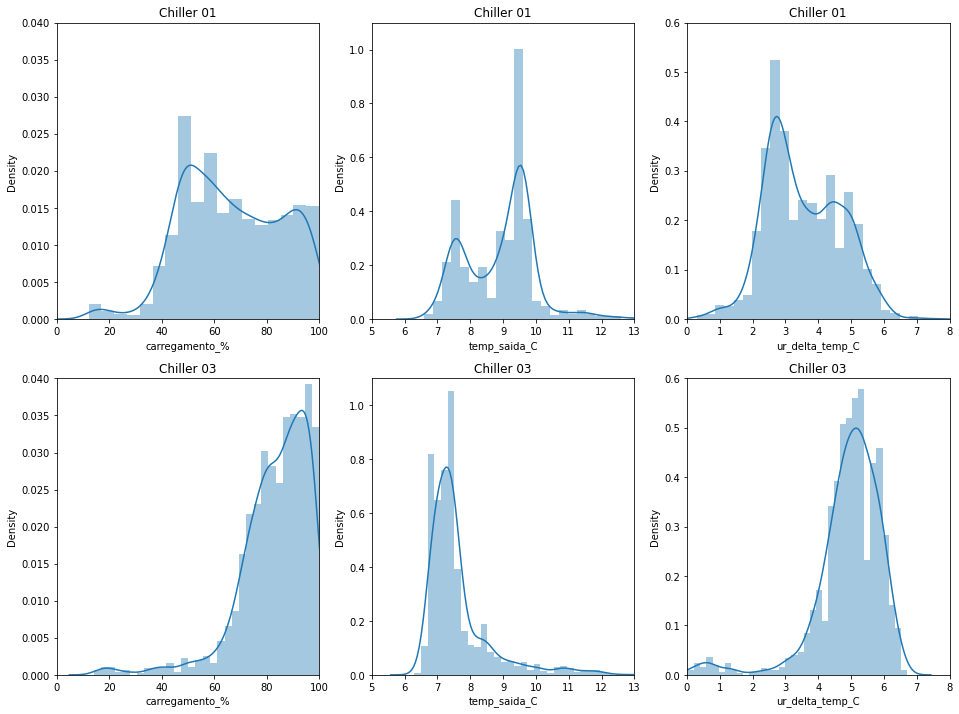

In [77]:
fig, axes = plt.subplots(2, 3, figsize = (16,12))

sns.distplot(df_chiller01['carregamento_%'], ax=axes[0, 0])
sns.distplot(df_chiller01['temp_saida_C'], ax=axes[0, 1])
sns.distplot(df_chiller01['ur_delta_temp_C'], ax=axes[0, 2])
axes[0, 0].set_title('Chiller 01')
axes[0, 1].set_title('Chiller 01')
axes[0, 2].set_title('Chiller 01')
axes[0, 0].set(xlim=(0, 100), ylim=(0, 0.04))
axes[0, 1].set(xlim=(5, 13), ylim=(0, 1.1))
axes[0, 2].set(xlim=(0, 8), ylim=(0, 0.6))


sns.distplot(df_chiller03['carregamento_%'], ax=axes[1, 0])
sns.distplot(df_chiller03['temp_saida_C'], ax=axes[1, 1])
sns.distplot(df_chiller03['ur_delta_temp_C'], ax=axes[1, 2])
axes[1, 0].set_title('Chiller 03')
axes[1, 1].set_title('Chiller 03')
axes[1, 2].set_title('Chiller 03')
axes[1, 0].set(xlim=(0, 100), ylim=(0, 0.04))
axes[1, 1].set(xlim=(5, 13), ylim=(0, 1.1))
axes[1, 2].set(xlim=(0, 8), ylim=(0, 0.6))

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

[(15.0, 35.0), (0.0, 0.3)]

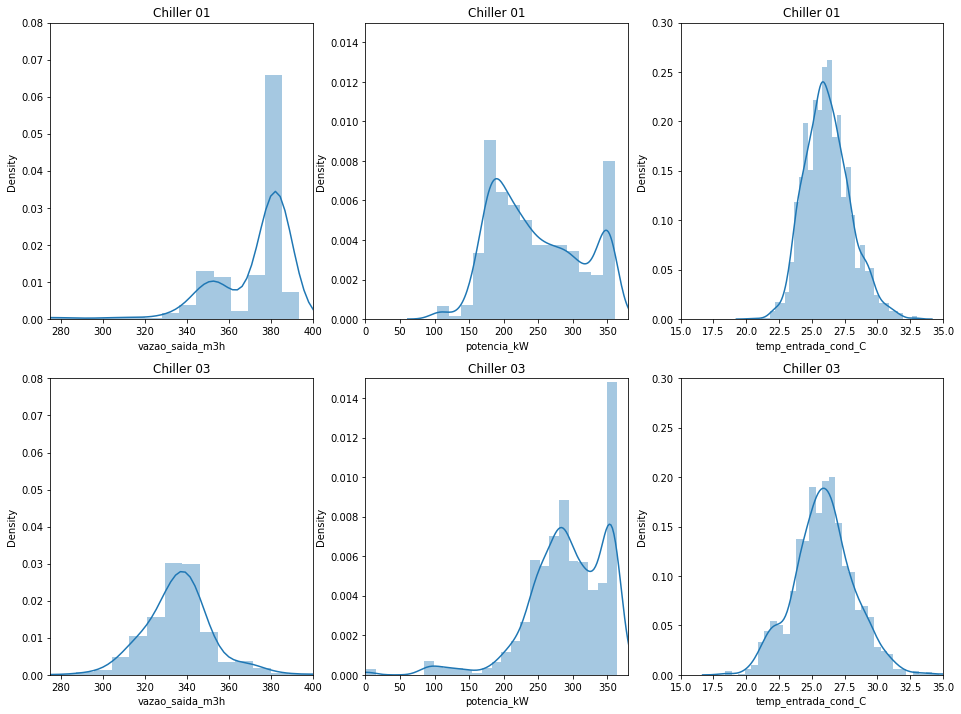

In [78]:
fig, axes = plt.subplots(2, 3, figsize = (16,12))

sns.distplot(df_chiller01['vazao_saida_m3h'], ax=axes[0, 0])
sns.distplot(df_chiller01['potencia_kW'], ax=axes[0, 1])
sns.distplot(df_chiller01['temp_entrada_cond_C'], ax=axes[0, 2])
axes[0, 0].set_title('Chiller 01')
axes[0, 1].set_title('Chiller 01')
axes[0, 2].set_title('Chiller 01')
axes[0, 0].set(xlim=(275, 400), ylim=(0, 0.08))
axes[0, 1].set(xlim=(0, 380), ylim=(0, 0.015))
axes[0, 2].set(xlim=(15, 35), ylim=(0, 0.3))

sns.distplot(df_chiller03['vazao_saida_m3h'], ax=axes[1, 0])
sns.distplot(df_chiller03['potencia_kW'], ax=axes[1, 1])
sns.distplot(df_chiller03['temp_entrada_cond_C'], ax=axes[1, 2])
axes[1, 0].set_title('Chiller 03')
axes[1, 1].set_title('Chiller 03')
axes[1, 2].set_title('Chiller 03')
axes[1, 0].set(xlim=(275, 400), ylim=(0, 0.08))
axes[1, 1].set(xlim=(0, 380), ylim=(0, 0.015))
axes[1, 2].set(xlim=(15, 35), ylim=(0, 0.3))

[(0.0, 700.0), (0.0, 0.5)]

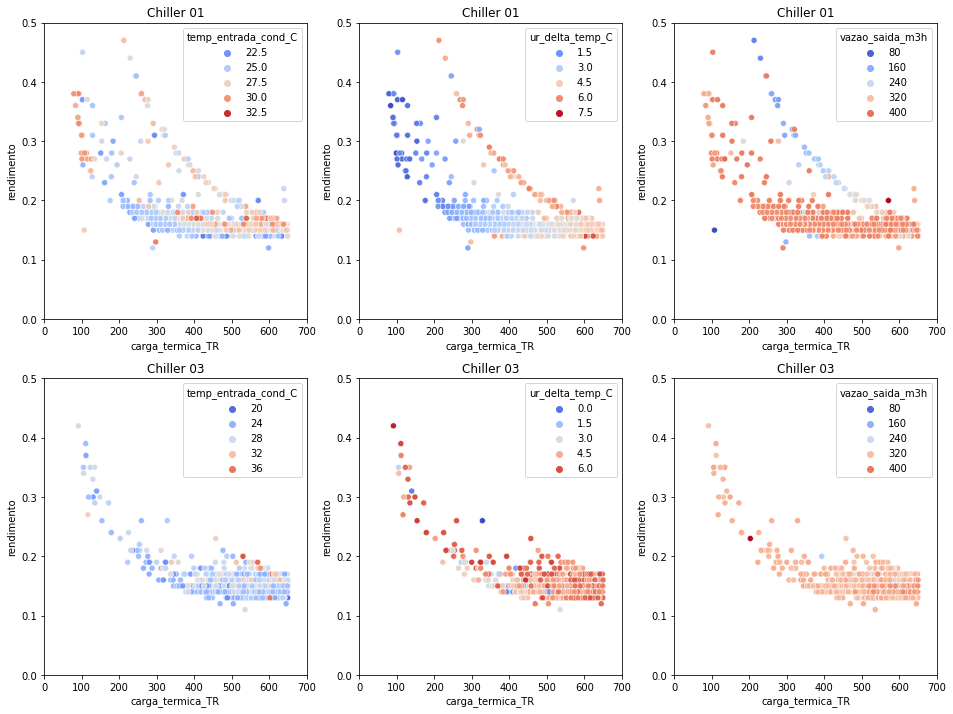

In [79]:
cmap = sns.color_palette("coolwarm", as_cmap=True)

fig, axes = plt.subplots(2, 3, figsize = (16,12))

sns.scatterplot(x=df_chiller01.carga_termica_TR, y=df_chiller01.rendimento,\
                hue=df_chiller01.temp_entrada_cond_C, palette=cmap, ax=axes[0,0])
#sns.scatterplot(x=df_chiller01.carga_termica_TR, y=df_chiller01.rendimento,\
#                hue=df_chiller01.temp_saida_C, palette=cmap, ax=axes[0,0])
sns.scatterplot(x=df_chiller01.carga_termica_TR, y=df_chiller01.rendimento,\
                hue=df_chiller01.ur_delta_temp_C, palette=cmap, ax=axes[0,1])
sns.scatterplot(x=df_chiller01.carga_termica_TR, y=df_chiller01.rendimento,\
                hue=df_chiller01.vazao_saida_m3h, palette=cmap, ax=axes[0,2])

axes[0, 0].set_title('Chiller 01')
axes[0, 1].set_title('Chiller 01')
axes[0, 2].set_title('Chiller 01')
axes[0, 0].set(xlim=(0, 700), ylim=(0, 0.5))
axes[0, 1].set(xlim=(0, 700), ylim=(0, 0.5))
axes[0, 2].set(xlim=(0, 700), ylim=(0, 0.5))


sns.scatterplot(x=df_chiller03.carga_termica_TR, y=df_chiller03.rendimento,\
                hue=df_chiller03.temp_entrada_cond_C, palette=cmap, ax=axes[1,0])
#sns.scatterplot(x=df_chiller03.carga_termica_TR, y=df_chiller03.rendimento,\
#                hue=df_chiller03.temp_saida_C, palette=cmap, ax=axes[1,0])
sns.scatterplot(x=df_chiller03.carga_termica_TR, y=df_chiller03.rendimento,\
                hue=df_chiller03.ur_delta_temp_C, palette=cmap, ax=axes[1,1])
sns.scatterplot(x=df_chiller03.carga_termica_TR, y=df_chiller03.rendimento,\
                hue=df_chiller03.vazao_saida_m3h, palette=cmap, ax=axes[1,2])
axes[1, 0].set_title('Chiller 03')
axes[1, 1].set_title('Chiller 03')
axes[1, 2].set_title('Chiller 03')
axes[1, 0].set(xlim=(0, 700), ylim=(0, 0.5))
axes[1, 1].set(xlim=(0, 700), ylim=(0, 0.5))
axes[1, 2].set(xlim=(0, 700), ylim=(0, 0.5))

## Concatening data from both chillers
Creating a unique model for both chiller, since they are same model/specification.

In [80]:
df_unified = pd.concat([df_chiller01, df_chiller03], ignore_index=True)
df_unified

Timestamp                        Equipamento  rendimento  \
0     01/09/2021 09:45:00  AC - CAG 1 - PISO G4 - CF 01 - 31        0.16   
1     01/09/2021 10:00:00  AC - CAG 1 - PISO G4 - CF 01 - 31        0.41   
2     01/09/2021 10:15:00  AC - CAG 1 - PISO G4 - CF 01 - 31        0.16   
3     01/09/2021 10:30:00  AC - CAG 1 - PISO G4 - CF 01 - 31        0.15   
4     01/09/2021 10:45:00  AC - CAG 1 - PISO G4 - CF 01 - 31        0.16   
...                   ...                                ...         ...   
3522  20/11/2021 21:15:00  AC - CAG 1 - PISO G4 - CF 03 - 31        0.14   
3523  20/11/2021 21:30:00  AC - CAG 1 - PISO G4 - CF 03 - 31        0.14   
3524  20/11/2021 21:45:00  AC - CAG 1 - PISO G4 - CF 03 - 31        0.14   
3525  20/11/2021 22:00:00  AC - CAG 1 - PISO G4 - CF 03 - 31        0.14   
3526  20/11/2021 22:15:00  AC - CAG 1 - PISO G4 - CF 03 - 31        0.15   

      carga_termica_TR  potencia_kW  temp_ambiente_C  umid_rel_%  \
0                555.4       301.83             21.1        91.4   
1                243.7       350.43             21.6        89.7   
2                612.3       349.55             22.0        85.7   
3                648.3       350.14             22.5        82.7   
4                644.5       351.34             22.8        80.6   
...                ...          ...              ...         ...   
3522             601.2       326.00             21.3        72.6   
3523             605.2       325.00             21.4        71.5   
3524             609.6       325.00             21.4        70.8   
3525             573.5       311.00             21.4        69.7   
3526             533.4       306.00             20.9        72.0   

      temp_saida_C  temp_entrada_C  ur_delta_temp_C  ...  carregamento_%  \
0             13.0            17.6              5.0  ...       85.446154   
1             10.9            16.3              4.9  ...       37.492308   
2             10.2            15.6              5.4  ...       94.200000   
3              9.7            15.3              5.1  ...       99.738462   
4              9.4            14.8              5.2  ...       99.153846   
...            ...             ...              ...  ...             ...   
3522           6.7            12.1              4.9  ...       92.492308   
3523           6.8            12.1              4.9  ...       93.107692   
3524           6.9            12.2              5.0  ...       93.784615   
3525           6.8            12.1              4.9  ...       88.230769   
3526           6.8            11.9              4.7  ...       82.061538   

      carga_termica_^2  rend_pred  carga_termica_inv  rend_pred_b  \
0            308469.16   0.216613           0.001801     0.151587   
1             59389.69   0.277162           0.004103     0.195438   
2            374911.29   0.178412           0.001633     0.148401   
3            420292.89   0.171038           0.001542     0.146674   
4            415380.25   0.163840           0.001552     0.146847   
...                ...        ...                ...          ...   
3522         361441.44   0.135772           0.001663     0.143909   
3523         366267.04   0.135532           0.001652     0.143628   
3524         371612.16   0.134933           0.001640     0.143324   
3525         328902.25   0.141895           0.001744     0.145960   
3526         284515.56   0.145611           0.001875     0.149306   

      rend_pred_c  carga_termica_log  rendimento_log  rend_pred_d  rend_pred_e  
0        0.152651           6.319689       -1.832581     0.151921     0.151573  
1        0.206924           5.495938       -0.891598     0.188540     0.332298  
2        0.162651           6.417222       -1.832581     0.148086     0.179792  
3        0.172153           6.474354       -1.897120     0.145885     0.172448  
4        0.171034           6.468475       -1.832581     0.146110     0.164177  
...           ...                ...             ...      

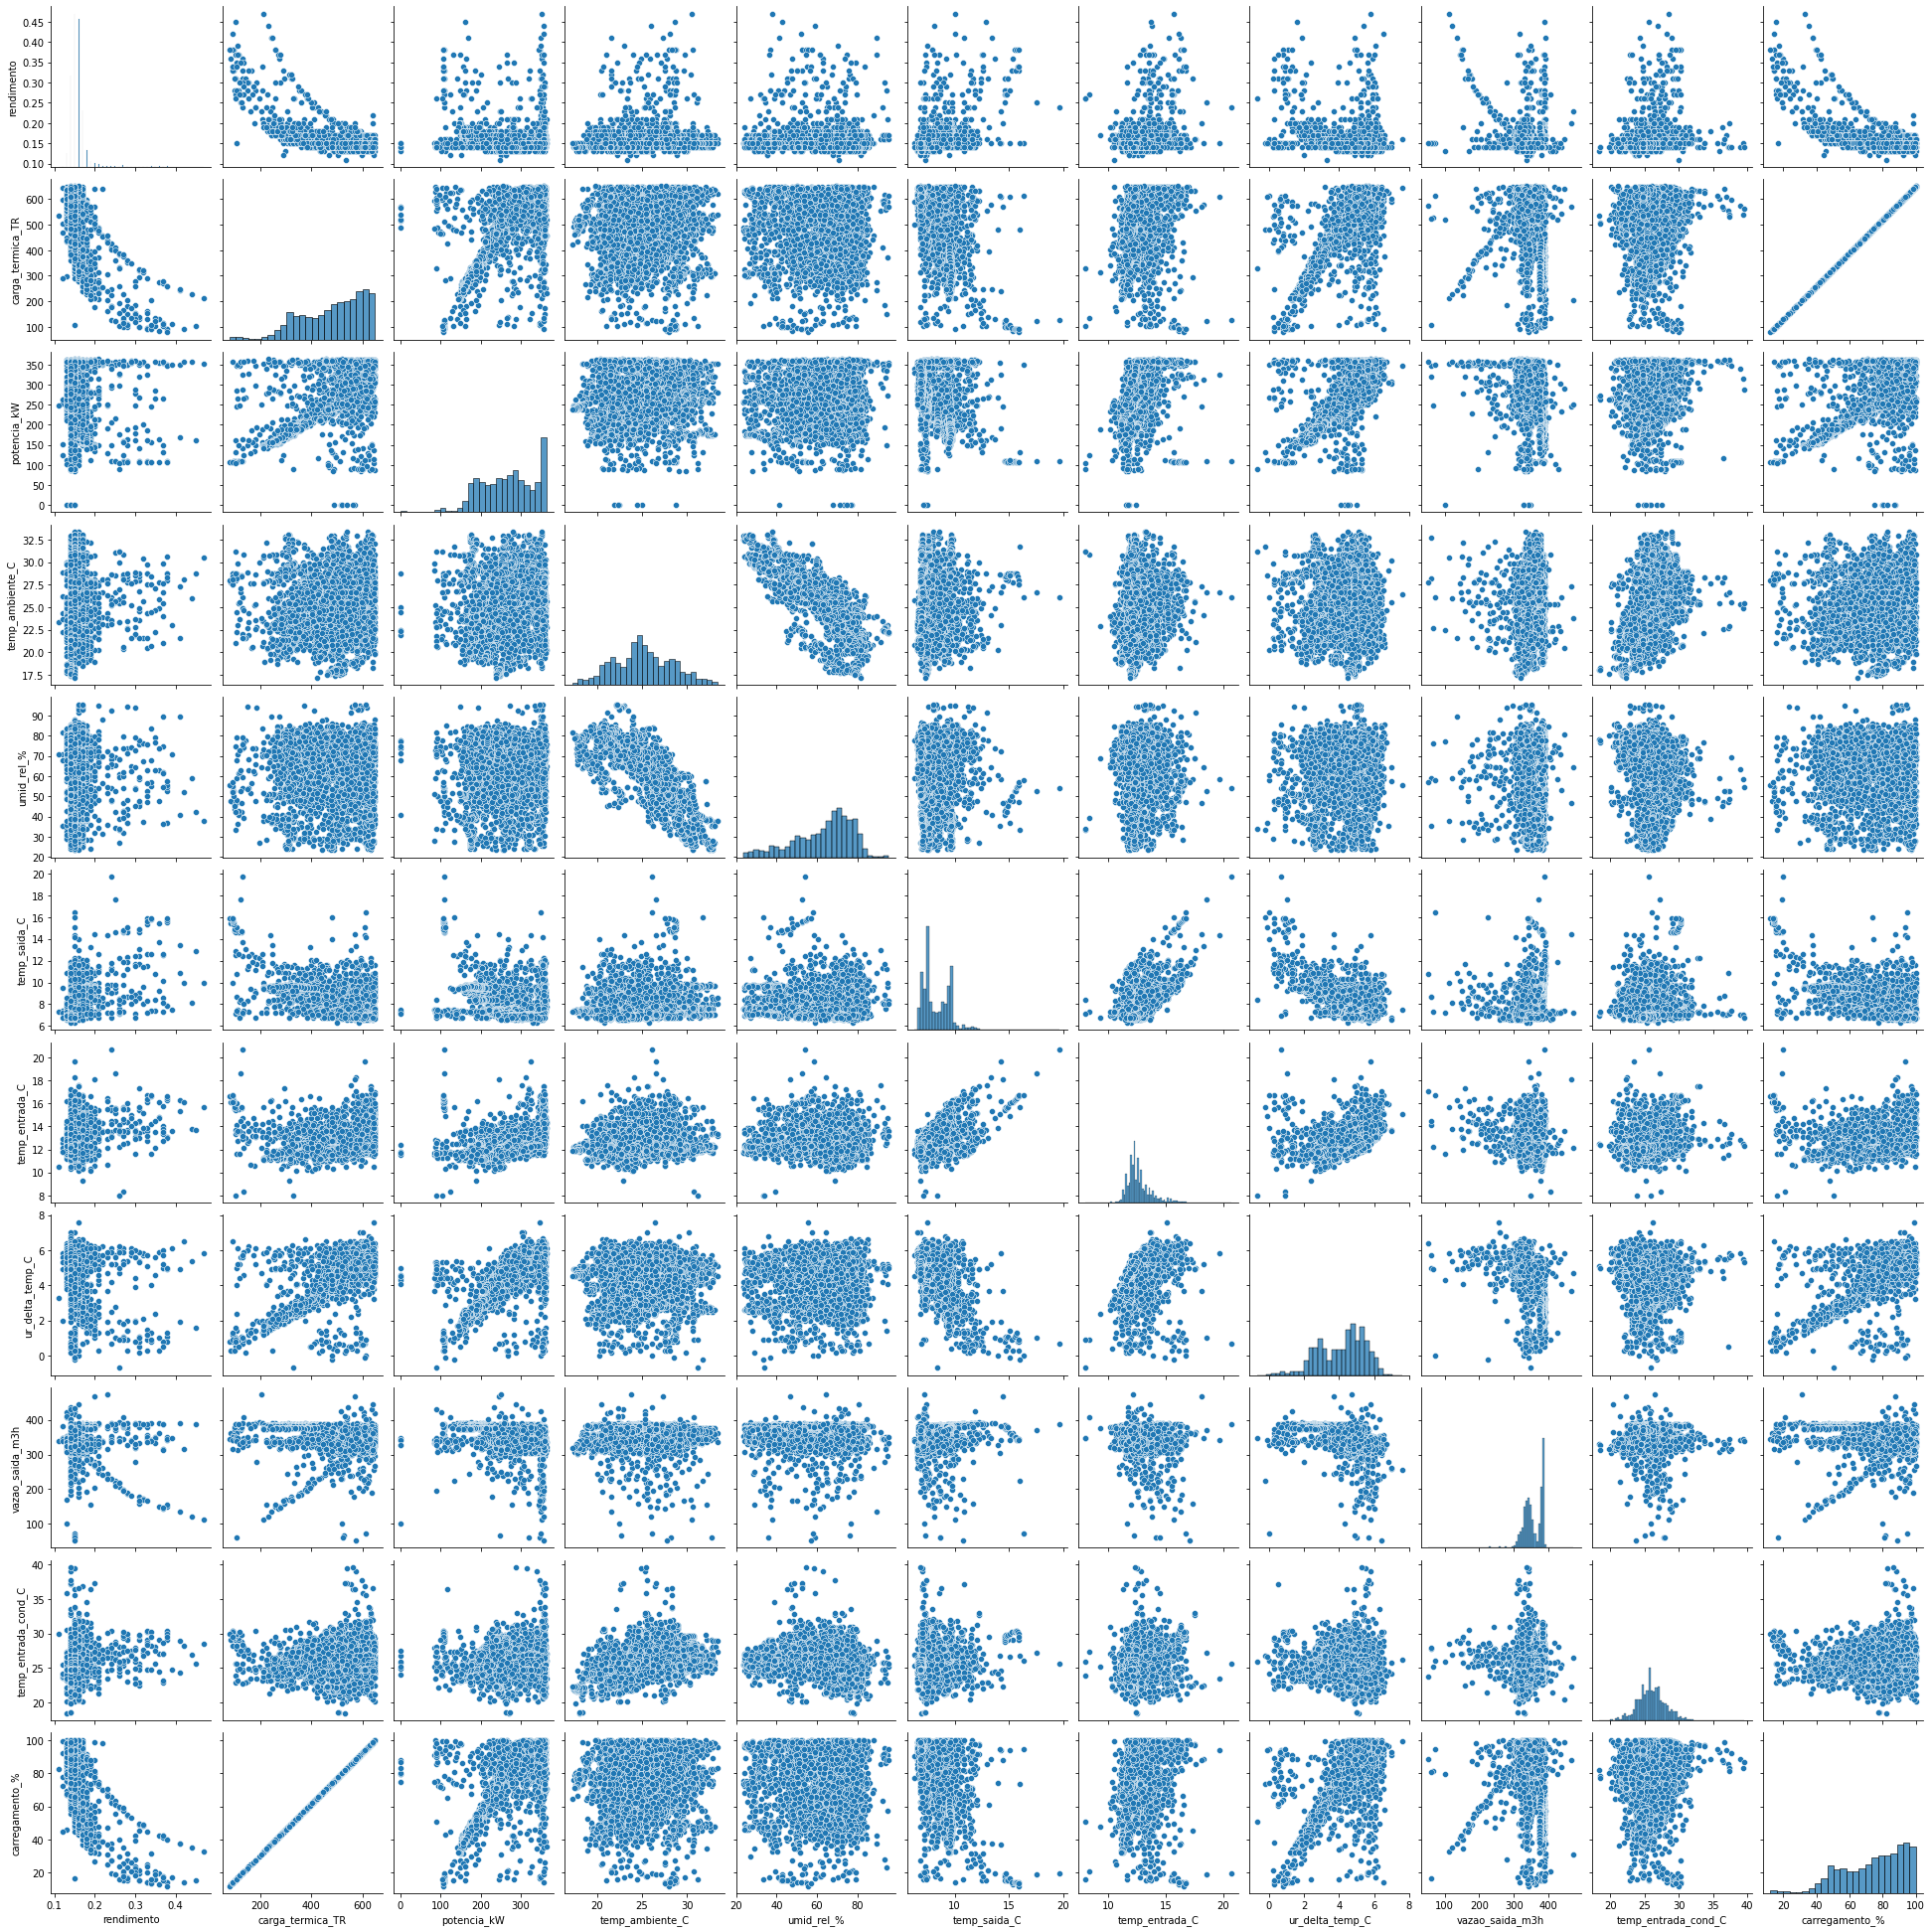

In [81]:
sns.pairplot(df_unified.loc[:, ['rendimento','carga_termica_TR',
       'potencia_kW', 'temp_ambiente_C', 'umid_rel_%', 'temp_saida_C',
       'temp_entrada_C', 'ur_delta_temp_C', 'vazao_saida_m3h',
       'temp_entrada_cond_C', 'carregamento_%']])

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

[(15.0, 35.0), (0.0, 0.25)]

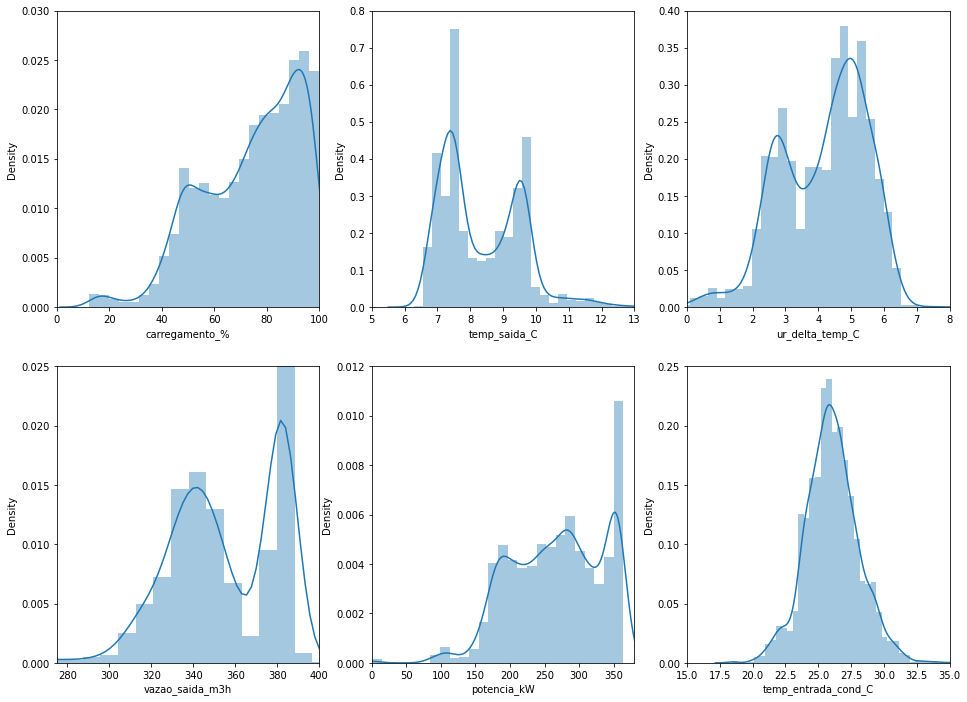

In [82]:
fig, axes = plt.subplots(2, 3, figsize = (16,12))

sns.distplot(df_unified['carregamento_%'], ax=axes[0, 0])
sns.distplot(df_unified['temp_saida_C'], ax=axes[0, 1])
sns.distplot(df_unified['ur_delta_temp_C'], ax=axes[0, 2])
axes[0, 0].set(xlim=(0, 100), ylim=(0, 0.03))
axes[0, 1].set(xlim=(5, 13), ylim=(0, 0.8))
axes[0, 2].set(xlim=(0, 8), ylim=(0, 0.4))


sns.distplot(df_unified['vazao_saida_m3h'], ax=axes[1, 0])
sns.distplot(df_unified['potencia_kW'], ax=axes[1, 1])
sns.distplot(df_unified['temp_entrada_cond_C'], ax=axes[1, 2])
axes[1, 0].set(xlim=(275, 400), ylim=(0, 0.025))
axes[1, 1].set(xlim=(0, 380), ylim=(0, 0.012))
axes[1, 2].set(xlim=(15, 35), ylim=(0, 0.25))

[(0.0, 700.0), (0.0, 0.5)]

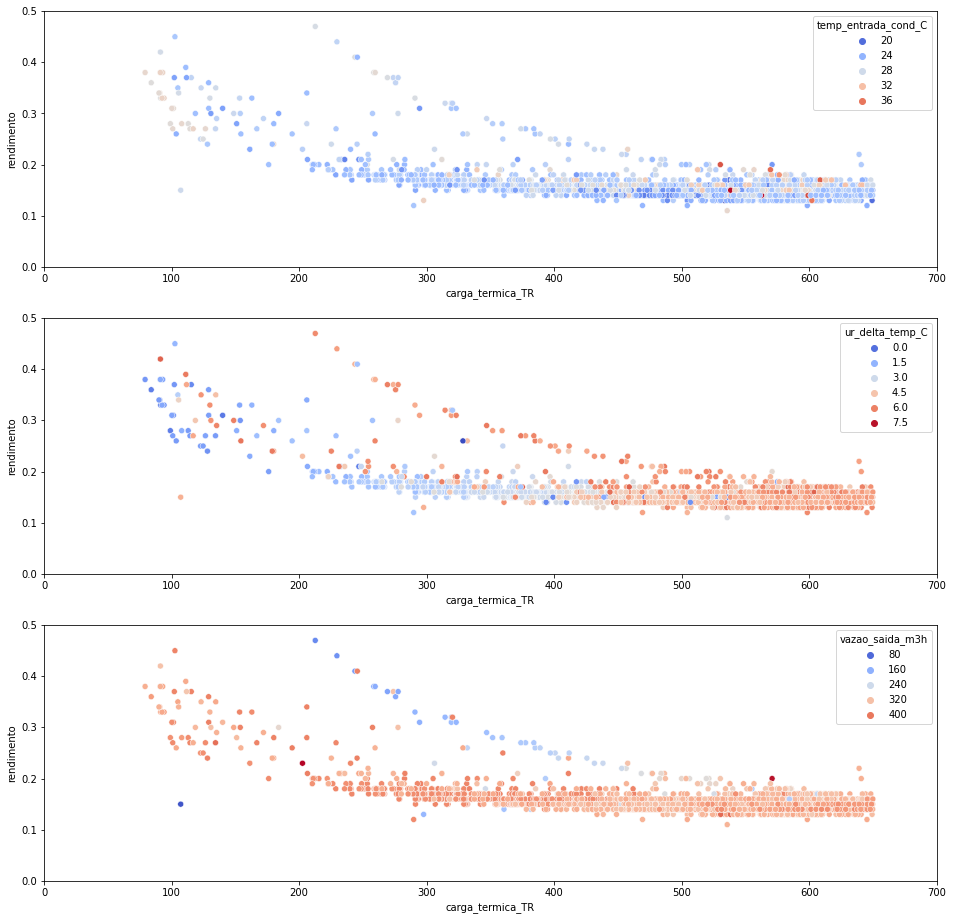

In [92]:
cmap = sns.color_palette("coolwarm", as_cmap=True)

fig, axes = plt.subplots(3, 1, figsize = (16,16))

sns.scatterplot(x=df_unified.carga_termica_TR, y=df_unified.rendimento,\
                hue=df_unified.temp_entrada_cond_C, palette=cmap, ax=axes[0])
#sns.scatterplot(x=df_unified.carga_termica_TR, y=df_unified.rendimento,\
#                hue=df_chiller01.temp_saida_C, palette=cmap, ax=axes[0])
sns.scatterplot(x=df_unified.carga_termica_TR, y=df_unified.rendimento,\
                hue=df_unified.ur_delta_temp_C, palette=cmap, ax=axes[1])
sns.scatterplot(x=df_unified.carga_termica_TR, y=df_unified.rendimento,\
                hue=df_unified.vazao_saida_m3h, palette=cmap, ax=axes[2])

axes[0].set(xlim=(0, 700), ylim=(0, 0.5))
axes[1].set(xlim=(0, 700), ylim=(0, 0.5))
axes[2].set(xlim=(0, 700), ylim=(0, 0.5))

<AxesSubplot:xlabel='carga_termica_TR', ylabel='rendimento'>

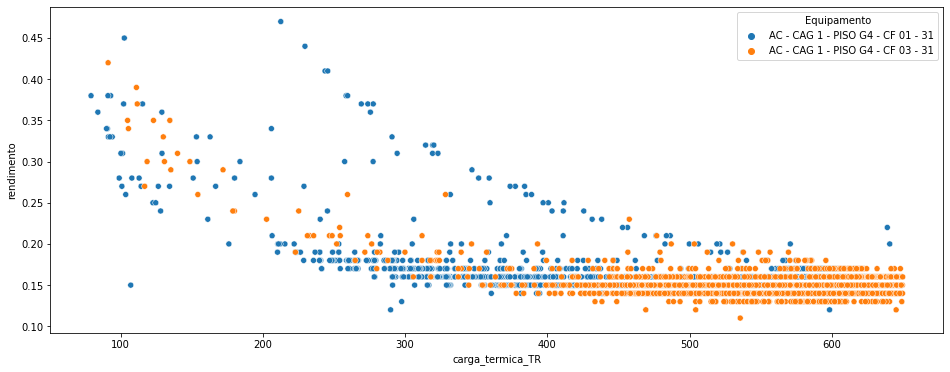

In [84]:
fig, axes = plt.subplots(figsize = (16,6))
sns.scatterplot(x=df_unified.carga_termica_TR, y=df_unified.rendimento,\
                hue=df_unified.Equipamento)

### Approach (f)

In [85]:
Xf = df_unified.loc[:, features2].values

modelf = LinearRegression()

yf = df_unified.loc[:, ['rendimento']].values

In [86]:
modelf.fit(Xf, yf)

LinearRegression()

In [87]:
df_unified['rend_pred_f'] = modelf.predict(Xf)

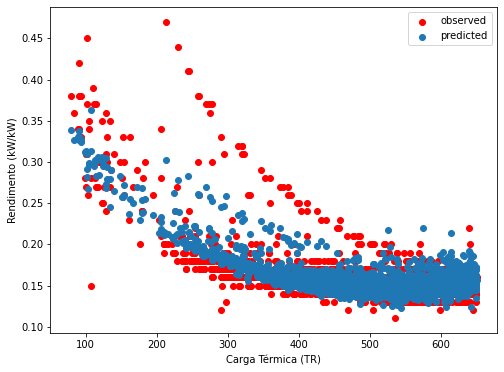

In [88]:
plt.figure(figsize=(8,6))
plt.xlabel('Carga Térmica (TR)')
plt.ylabel('Rendimento (kW/kW)')
plt.scatter(df_unified['carga_termica_TR'], df_unified['rendimento'], color='red', label='observed')

# plot the predicted values together with the observed values
plt.scatter(df_unified['carga_termica_TR'], df_unified['rend_pred_f'], label='predicted')


plt.legend();

In [89]:
np.sqrt(mean_squared_error(df_unified['rendimento'], df_unified['rend_pred_f']))

0.017750071802156767

In [90]:
np.sqrt(mean_squared_error(df_unified['rendimento'], df_unified['rend_pred_f']))/df_unified['rend_pred_f'].mean()

0.11131668429268658

In [91]:
modelf.score(Xf, yf)

0.6473116772785376